# Project: Investigation of no-shows dataset
## You can find dataset here: [source](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1532469042118000)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Overview**: this dataset describes medical appointments with 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. 

> **Data Dictionary**:
- PatientId - unique patient identificator
- AppointmentId - unique appointment identificator
- Gender - patient's gender
- ScheduledDay - the day the appointment has been registered
- AppointmentDay - day of the appointment
- Age - patient's age
- Neighbourhood - Place of the appointment
- Scholarship - check the [source](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hipertension 
- Diabetes
- Alcoholism
- Handcap
- SMS_received - whether the patient has received a message
- No-show - crucial factor, determines whether the patient has shown up for the appointment or not

> **Goals**:
- is there any specific combination of characteristics that might increase the impact on no-shows
- which characteristics have the highest impact on patient showing up for an appointment
- to group patients into groups based on their potiential of showing up for an appointment
- if there is a person who has missed an appointment once - does it affect his/her appointments in the future?

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: ?

> **Number of Non-null records**: ?

### Step 1: Import libraries and load data into dataframe

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 2: Check number of unique records

> To check for records duplication I will use 'duplicated()' function, first for all rows and afterwards for AppointmentID. Any other subset of columns passed as an argument for duplicated() function might result in false-positive duplication

In [53]:
df.duplicated().sum()

0

In [55]:
df.duplicated(['AppointmentID']).sum()

0

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: 0

> **Number of Non-null records**: ?

### Step 3: Check number of non-null records

> To check for null/NaN records 'isna()' function will be used

In [57]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### General Properties
> **Number of records**: 110,527

> **Number of unique records**: 0

> **Number of Non-null records**: 0

> Data looks correct, there are no duplicates or null values. 

### Step 4: Validate data types

> Before exploratory data analysis let's check datatypes for each column to make sure there is no data conversion needed

In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

> All datatypes looks correct, except dates. String values are marked as 'objects', the rest is integer - what is good for a flag indicating True or False value

> Changing date columns to datetimes

In [16]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'], format="%Y-%m-%dT%H:%M:%SZ")
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'], format="%Y-%m-%dT%H:%M:%SZ")

In [19]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [18]:
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Replace this header name!)

Data types look valid, all categorical features are marked as int, what is reasonable since almost all of these categories are flagged as 0 and 1

### Step 5: Isolation of no-shows 

In [21]:
noshows = df[df['No-show']=='Yes']

In [22]:
noshows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


### Step 6: Analysis of features one by one

**1. Neighbourhoods**

Let's find the top 5 neighbourhoods for no-shows

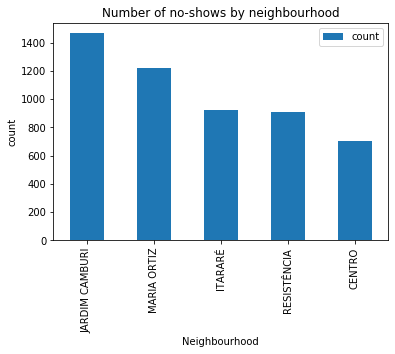

In [185]:
top5neighbourhoods = noshows.groupby(by='Neighbourhood').count()['PatientId'].reset_index(name='count').sort_values('count',ascending=False).head(5)
top5neighbourhoods.plot(kind='bar', x='Neighbourhood', y='count');
plt.ylabel('count');
plt.title('Number of no-shows by neighbourhood');

JARDIM CAMBURI seems to be the main neighbourhood for no-shows, but this information is meaningless without the number of all apointments.

In [43]:
neighbourhoods = df.groupby(by='Neighbourhood').count()['PatientId'].reset_index(name='count')
neighbourhoods_noshows = noshows.groupby(by='Neighbourhood').count()['PatientId'].reset_index(name='no-showCount')
neighbourhoods = neighbourhoods.merge(neighbourhoods_noshows,how='inner',on='Neighbourhood')
neighbourhoods['no-showRatio']=neighbourhoods['no-showCount']/neighbourhoods['count']
neighbourhoods.sort_values('no-showRatio', ascending=False).head(10)

,Neighbourhood,count,no-showCount,no-showRatio
34,ILHAS OCEÂNICAS DE TRINDADE,2,2,1.000000
69,SANTOS DUMONT,1276,369,0.289185
60,SANTA CECÍLIA,448,123,0.274554
61,SANTA CLARA,506,134,0.264822
36,ITARARÉ,3514,923,0.262664
40,JESUS DE NAZARETH,2853,696,0.243954
28,HORTO,175,42,0.240000
33,ILHA DO PRÍNCIPE,2266,532,0.234775
9,CARATOÍRA,2565,591,0.230409
1,ANDORINHAS,2262,521,0.230327


During the analysis we've found out that we might have neighbourhoods with only a few appointments, where all of them were no-shows, let's exclude them from further analysis.

In [47]:
neighbourhoods = neighbourhoods[neighbourhoods['count']>10]
neighbourhoods.sort_values('no-showRatio', ascending=False).head(10)

,Neighbourhood,count,no-showCount,no-showRatio
69,SANTOS DUMONT,1276,369,0.289185
60,SANTA CECÍLIA,448,123,0.274554
61,SANTA CLARA,506,134,0.264822
36,ITARARÉ,3514,923,0.262664
40,JESUS DE NAZARETH,2853,696,0.243954
28,HORTO,175,42,0.240000
33,ILHA DO PRÍNCIPE,2266,532,0.234775
9,CARATOÍRA,2565,591,0.230409
1,ANDORINHAS,2262,521,0.230327
55,PRAIA DO SUÁ,1288,294,0.228261


Now we can say than even though JARDIM CAMBURI has had the highest count for no-shows, the overall ratio is not that bad due to fair amount of overall apointments.

In [48]:
neighbourhoods[neighbourhoods['Neighbourhood']=='JARDIM CAMBURI']

,Neighbourhood,count,no-showCount,no-showRatio
38,JARDIM CAMBURI,7717,1465,0.189841


The worst no-show ratio was noticed in SANTOS DUMONT neighbourhood with almost 30% of no-shows.

**2. Age**

We will start checking the number of no-shows by age

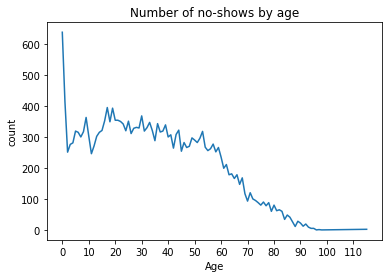

In [187]:

noshowsByAge = noshows.groupby(by='Age').count()['PatientId'].reset_index(name='count')

plt.xticks(np.arange(min(noshowsByAge['Age']), max(noshowsByAge['Age']), 10.0))
plt.plot(noshowsByAge['Age'],noshowsByAge['count']);
plt.ylabel('count')
plt.xlabel('Age')
plt.title('Number of no-shows by age');

On this plot there are actually a lot of no-shows in the age of 0 - that's a sign of bad data

In [51]:
noshows[noshows['Age']==0]['PatientId'].count()

639

In [52]:
noshows.shape

(22319, 14)

For further age analysis we need to omit the patients who have entered 0 as their age

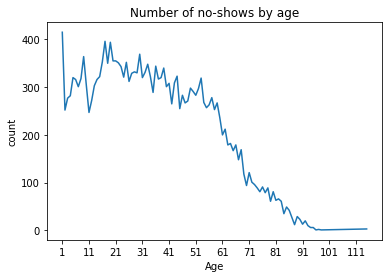

In [189]:
noshowsByAge = noshows[noshows['Age']>0].groupby(by='Age').count()['PatientId'].reset_index(name='count')

plt.xticks(np.arange(min(noshowsByAge['Age']), max(noshowsByAge['Age']), 10.0))
plt.plot(noshowsByAge['Age'],noshowsByAge['count']);
plt.ylabel('count')
plt.xlabel('Age')
plt.title("Number of no-shows by age");

Looks like age and number of no-shows might actually be correlated, but before we check that let's take a glimpse at age distribution

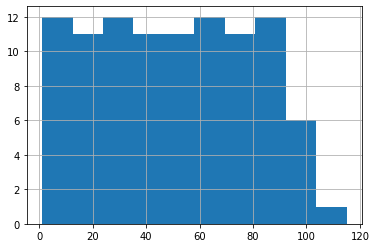

In [56]:
noshowsByAge['Age'].hist();

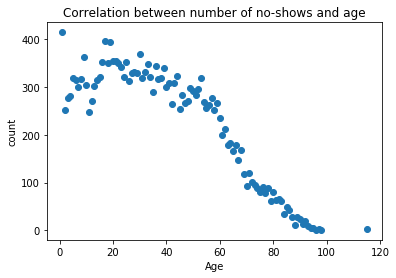

In [191]:
plt.scatter(noshowsByAge['Age'],noshowsByAge['count']);
plt.ylabel('count')
plt.xlabel('Age')
plt.title('Correlation between number of no-shows and age');

Correlation between age and number of no-shows

In [61]:
noshowsByAge['Age'].corr(noshowsByAge['count'])

-0.9013275624737975

Correlation is pretty high, we could save it for later and try to combine age with different features to create better model

Lets try also simple linear regression model to get some scores

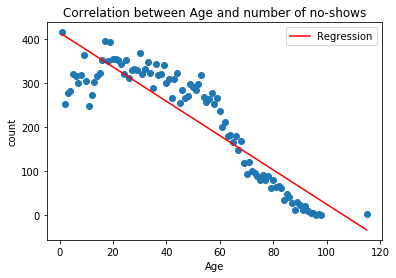

In [197]:
from sklearn.linear_model import LinearRegression
x=noshowsByAge.iloc[:, 0].values.reshape(-1, 1)
y=noshowsByAge.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(x, y) 
y_pred = linear_regressor.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red', label='Regression')
plt.legend()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Correlation between Age and number of no-shows');
plt.show();


**3. Gender**

Let's start by checking who's not showing up more often

In [97]:
noshowsByGender = noshows.groupby(by='Gender').count()['PatientId'].reset_index(name='count')
noshowsByGender

,Gender,count
0,F,14594
1,M,7725


As before we see total numbers indicating that women are not showing up way often than men. To make sure that's the case ratio has to be calculated

In [98]:
allGenders=df.groupby(by='Gender').count()['PatientId'].reset_index(name='total_count')
noshowsByGender=noshowsByGender.merge(allGenders, on='Gender')
noshowsByGender['ratio']=noshowsByGender['total_count']/noshowsByGender['count']
noshowsByGender

,Gender,count,total_count,ratio
0,F,14594,71840,4.922571
1,M,7725,38687,5.008026


After calculating the ratio turns out Men are not showing up more often than women.

**4.Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_Received flags**

In [39]:
noshows.groupby(by='Scholarship').count()['PatientId']

Scholarship
0    19741
1     2578
Name: PatientId, dtype: int64

In [40]:
noshows.groupby(by='Hipertension').count()['PatientId']

Hipertension
0    18547
1     3772
Name: PatientId, dtype: int64

In [41]:
noshows.groupby(by='Diabetes').count()['PatientId']

Diabetes
0    20889
1     1430
Name: PatientId, dtype: int64

In [42]:
noshows.groupby(by='Alcoholism').count()['PatientId']

Alcoholism
0    21642
1      677
Name: PatientId, dtype: int64

In [43]:
noshows.groupby(by='Handcap').count()['PatientId']

Handcap
0    21912
1      366
2       37
3        3
4        1
Name: PatientId, dtype: int64

In [44]:
noshows.groupby(by='SMS_received').count()['PatientId']

SMS_received
0    12535
1     9784
Name: PatientId, dtype: int64

In [50]:
noshows.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [53]:
noshows=noshows[['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']]

Scatter matrix for chosen features

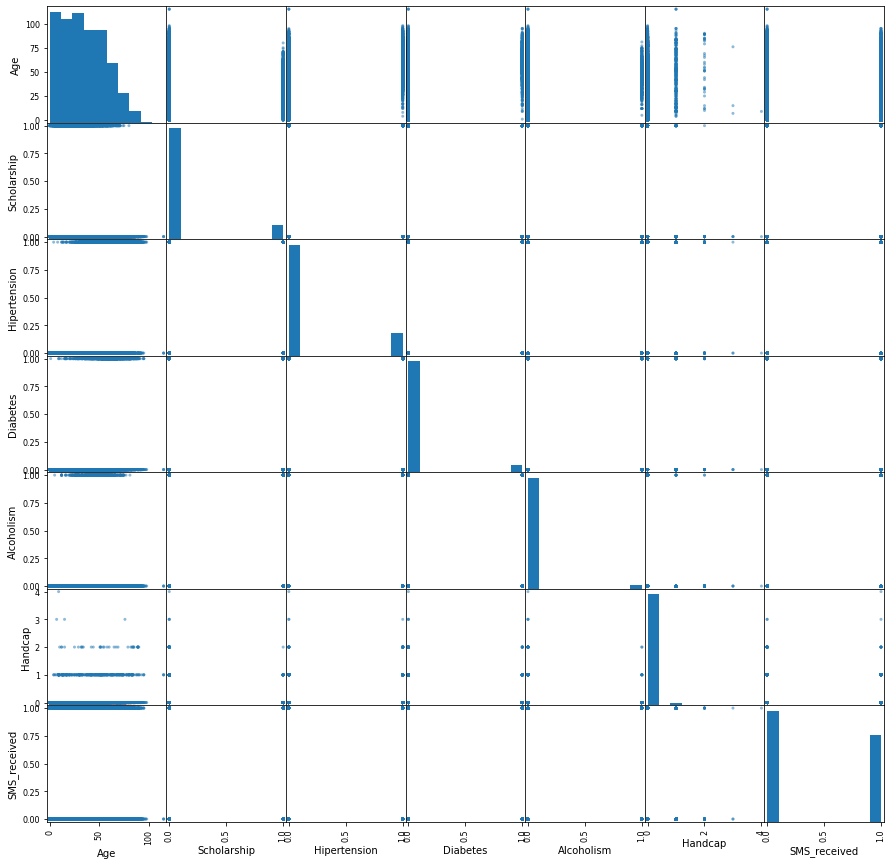

In [54]:
pd.plotting.scatter_matrix(noshows, figsize=(15,15));

Check the characteristics with highest number of no-shows

In [116]:
noshowsGrouped=noshows[noshows['Age']>0].groupby(by=['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']).count()['PatientId'].reset_index(name="count").sort_values("count",ascending=False)
noshowsGrouped

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,count
106,F,19,0,0,0,0,0,1,128
112,F,20,0,0,0,0,0,1,127
122,F,21,0,0,0,0,0,1,125
132,F,22,0,0,0,0,0,1,123
158,F,25,0,0,0,0,0,1,119
...,...,...,...,...,...,...,...,...,...
1463,M,46,0,0,1,1,0,0,1
468,F,44,1,0,0,1,0,0,1
469,F,44,1,0,0,1,0,1,1
1466,M,46,0,1,0,0,1,0,1


In [127]:
showsGrouped = df[(df['Age']>5) & (df['No-show']=='No')].groupby(by=['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']).count()['PatientId'].reset_index(name="shows_count").sort_values("shows_count",ascending=False)
showsGrouped

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,shows_count
94,F,18,0,0,0,0,0,0,503
129,F,21,0,0,0,0,0,0,494
104,F,19,0,0,0,0,0,0,485
118,F,20,0,0,0,0,0,0,472
267,F,30,0,0,0,0,0,0,461
...,...,...,...,...,...,...,...,...,...
2283,M,53,0,1,1,1,0,1,1
1289,F,70,1,1,1,0,0,1,1
2285,M,53,1,0,0,0,0,1,1
2286,M,53,1,0,0,1,0,1,1


In [132]:
combined=showsGrouped.merge(noshowsGrouped, how='inner', on=['Gender','Age','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received'])
combined['ratio']=combined['count']/(combined['shows_count']+combined['count'])
combined[combined['Age']>10].sort_values('ratio', ascending=False).head(10)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,shows_count,count,ratio
1594,M,83,0,1,0,0,1,0,1,6,0.857143
1627,M,47,0,0,0,1,0,1,1,5,0.833333
1648,M,23,0,1,0,0,0,1,1,4,0.800000
1679,F,78,0,0,1,0,0,1,1,4,0.800000
1598,F,44,1,1,0,1,0,0,1,4,0.800000
1609,F,40,1,0,0,1,0,1,1,4,0.800000
1666,M,34,1,0,0,0,0,1,1,4,0.800000
1505,F,53,0,0,1,0,0,1,2,7,0.777778
1607,F,41,1,0,0,1,0,1,1,3,0.750000
1644,M,21,1,0,0,0,0,1,1,3,0.750000


In [135]:
combined[(combined['shows_count']+combined['count'])>10].sort_values('ratio', ascending=False).head(10)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,shows_count,count,ratio
1342,M,9,0,0,0,0,1,0,3,18,0.857143
1023,F,30,0,0,0,0,1,0,7,10,0.588235
1089,F,41,1,0,0,1,0,0,6,8,0.571429
676,F,15,1,0,0,0,0,1,19,23,0.547619
1180,F,63,0,0,0,0,1,0,5,6,0.545455
1054,M,42,0,1,0,0,0,1,7,8,0.533333
629,F,16,1,0,0,0,0,1,22,22,0.500000
1080,F,43,0,0,0,1,0,0,6,6,0.500000
1075,F,37,1,0,0,1,0,0,6,6,0.500000
918,F,7,1,0,0,0,0,1,9,9,0.500000


After calculating ratios the most difficult group to deal with is men of age 9, handicapped.

It seems like women in age 19-22 who have received a message are the most common no-shows for a given dataset

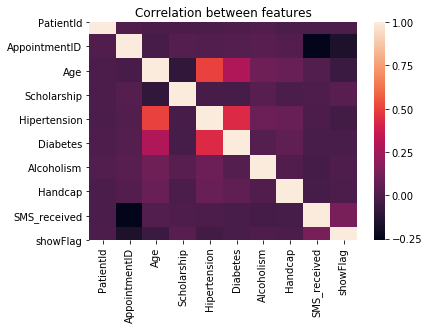

In [200]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr);
plt.title('Correlation between features');

In [148]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [149]:
df['showFlag']=df['No-show'].map({"Yes":1,"No":0})
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,showFlag
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [161]:
cor=df.corr()
#print(cor)
corr_target=abs(cor["showFlag"])
print(corr_target)


PatientId        0.001461
AppointmentID    0.162602
Age              0.060319
Scholarship      0.029135
Hipertension     0.035701
Diabetes         0.015180
Alcoholism       0.000196
Handcap          0.006076
SMS_received     0.126431
showFlag         1.000000
Name: showFlag, dtype: float64


showFlag    1.0
Name: showFlag, dtype: float64

In [178]:
noshowsMultiple=noshows.groupby(by='PatientId').count()['AppointmentID'].reset_index(name='noshows_count').query("noshows_count>1")
dfMultiple=df.merge(noshowsMultiple,how='left', on='PatientId')
dfMultiple['MultipleNo-show']=dfMultiple['noshows_count'].apply(lambda x: 1 if x>1 else 0)
corr=dfMultiple.corr()
abs(corr['showFlag'])


PatientId          0.001461
AppointmentID      0.162602
Age                0.060319
Scholarship        0.029135
Hipertension       0.035701
Diabetes           0.015180
Alcoholism         0.000196
Handcap            0.006076
SMS_received       0.126431
showFlag           1.000000
noshows_count      0.059045
MultipleNo-show    0.329880
Name: showFlag, dtype: float64

It looks like there is a weak correlation between showing up for an appointment and having not shown more than once in the past.

<a id='conclusions'></a>
## Conclusions

> **Outcomes**: 
- looks like there is no one simple combination of characteristics which might help us categorise patients into more-likely to not show up for an appointment.
- Out of chosen features a flag indicating having more than one not shown up appointment looks like the one with highest impact